# Boston house price regression

This is a dataset of house prices in Boston, which can be used to understand regression algorithms. The input data is variety of value and category based data so it also demonstrates various types of data preparation.

Sources and further learning:
    
* http://archive.ics.uci.edu/ml/machine-learning-databases/housing/
* https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset
* https://www.kaggle.com/vikrishnan/boston-house-prices
* https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

In [1]:
import os
import pandas
import numpy
import matplotlib
import matplotlib.pyplot

In [2]:
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.neighbors
import sklearn.linear_model
import sklearn.neural_network
import sklearn.kernel_ridge
import sklearn.svm
import sklearn.metrics
import sklearn.decomposition
import sklearn.ensemble

## Data loading, preprocessing and exploration


In [3]:
# this data can also be accessed through scikit-learn using sklearn.datasets.load_boston
with open('housing.names') as housing_metadata_file:
    data_info = housing_metadata_file.readlines()
df_housing = pandas.read_csv('housing.csv', )
df_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
print('Description of the feeatures in the dataset.')
print('\n'.join([l1 for l1 in data_info[30:47] if l1.replace(' ','')]))

Description of the feeatures in the dataset.
    1. CRIM      per capita crime rate by town

    2. ZN        proportion of residential land zoned for lots over 

                 25,000 sq.ft.

    3. INDUS     proportion of non-retail business acres per town

    4. CHAS      Charles River dummy variable (= 1 if tract bounds 

                 river; 0 otherwise)

    5. NOX       nitric oxides concentration (parts per 10 million)

    6. RM        average number of rooms per dwelling

    7. AGE       proportion of owner-occupied units built prior to 1940

    8. DIS       weighted distances to five Boston employment centres

    9. RAD       index of accessibility to radial highways

    10. TAX      full-value property-tax rate per $10,000

    11. PTRATIO  pupil-teacher ratio by town

    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 

                 by town

    13. LSTAT    % lower status of the population

    14. MEDV     Median value of owner-occupied

In [5]:
target_name = 'MEDV'
target_average = df_housing.MEDV.mean()
print(f'average value for target: {target_average}')

average value for target: 22.532806324110677


In [6]:
numerical_features_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
binary_features_names = ['CHAS']

### Data preprocessing
From this dataset we need to identify which columns represent input features, and which column represents our target. In this case "MEDV", the median house price for area represented by each row, is our target, and all the other columns are input features. These are mostly continuously valued real numbers, so we will apply standard normalisation. The "CHAS" variables, which represents whether the area is adjacent to the Charles River which flows through Boston, is a binary variable (1 if adjacent, 0 if not) and so is already to use.

In [7]:
scaler1 = sklearn.preprocessing.StandardScaler()
_ = scaler1.fit(df_housing[numerical_features_names])

In [8]:
df_housing_pp = pandas.concat(
    [pandas.DataFrame(data=scaler1.transform(df_housing[numerical_features_names]),columns=numerical_features_names),
     df_housing[binary_features_names], 
     df_housing[[target_name]]],
    sort=False,
    axis=1)


### Exploration and feature selection
As an initial exploration we may want to look for correlations between the input features and the target variable to use only relevant variables for prediction. Alternatively we can try a dimensionality reduction technique like principal component analysis.

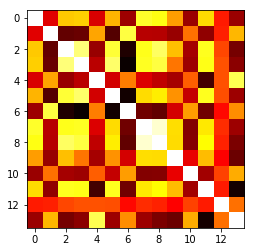

In [9]:
corr1 = numpy.corrcoef(df_housing_pp.to_numpy().transpose())
fig1 = matplotlib.pyplot.figure('feature correlation heatmap')
ax1 = fig1.add_subplot(111)
_ = ax1.imshow(corr1,cmap='hot')


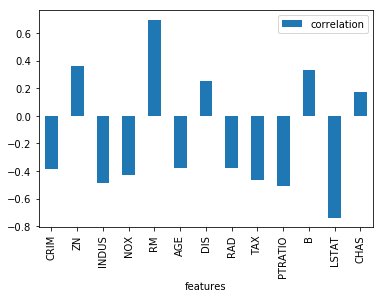

In [10]:
_ = pandas.DataFrame.from_dict({
    'features': list(df_housing_pp.columns)[:-1], 
    'correlation': corr1[:,-1][:-1]
}).plot.bar(x='features',y='correlation')


In [11]:
max_corr_features = ['LSTAT','PTRATIO','RM']

In [12]:
df_housing_corrs = df_housing_pp[max_corr_features + [target_name]]
df_housing_corrs

,LSTAT,PTRATIO,RM,MEDV
0,-1.075562,-1.459000,0.413672,24.0
1,-0.492439,-0.303094,0.194274,21.6
2,-1.208727,-0.303094,1.282714,34.7
3,-1.361517,0.113032,1.016303,33.4
4,-1.026501,0.113032,1.228577,36.2
...,...,...,...,...
501,-0.418147,1.176466,0.439316,22.4
502,-0.500850,1.176466,-0.234548,20.6
503,-0.983048,1.176466,0.984960,23.9
504,-0.865302,1.176466,0.725672,22.0


The three variables with the highest correlation magnitude are LSTAT, PTRATIO and RM, so we might want to select these variables if we were choosing subset of features.

An alternative to find a thre component dataset is to use a dimensionality reduction technique like principal component analysis (PCA).

In [13]:
pca_features = ['comp1','comp2','comp3']
decomp1 = sklearn.decomposition.PCA(n_components=len(pca_features))
decomp1.fit(df_housing_pp[numerical_features_names + binary_features_names])
df_housing_reduced = pandas.concat( [pandas.DataFrame(data=decomp1.transform(df_housing_pp[numerical_features_names + binary_features_names]), columns=pca_features),
                                     df_housing_pp[[target_name]] ],
                                   axis=1)
df_housing_reduced

,comp1,comp2,comp3,MEDV
0,-2.097292,-0.726005,0.917715,24.0
1,-1.456071,-0.942911,-0.193986,21.6
2,-2.073516,-0.628606,0.664419,34.7
3,-2.610234,-0.131954,0.066014,33.4
4,-2.456938,-0.228519,0.154069,36.2
...,...,...,...,...
501,-0.313789,-1.138106,-0.279851,22.4
502,-0.109305,-1.317488,-0.656767,20.6
503,-0.311342,-1.395726,0.410561,23.9
504,-0.269452,-1.348896,0.171112,22.0


In [14]:
decomp1.explained_variance_

array([6.13885799, 1.34653527, 1.18396123])

## Training a regressor

Now that we have prepared the data, we can starting fitting regression algorithms. We can try several and see which performs best for this application. it is always good to start with simplest possible approach. A linear model is always a good starting point. When a human evaluates what a house is really worth, one usually starts by looking at the neighbours, so we can also try a nearest neighbour approach in ML with k nearest neighbours. We will try the following on regressors:
* linear 
* k-neighbours
* kernel ridge regression

on each of of three input datasets
* all features
* max correlation features
* dimensions reduced to three using PCA


In [15]:
regressors_raw = {
    'linear' : sklearn.linear_model.LinearRegression(),
    'knn2' : sklearn.neighbors.KNeighborsRegressor(n_neighbors=2),
    'knn5' : sklearn.neighbors.KNeighborsRegressor(n_neighbors=5),
    'knn10' : sklearn.neighbors.KNeighborsRegressor(n_neighbors=10),
    'kernel_ridge' : sklearn.kernel_ridge.KernelRidge(kernel='polynomial'),
    'decision_tree' : sklearn.tree.DecisionTreeRegressor(),
    'random_forest' : sklearn.ensemble.RandomForestRegressor(),
    'neural_net' : sklearn.neural_network.MLPRegressor(hidden_layer_sizes=[10,10,10],max_iter=5000),
}

In [16]:
feature_datasets_dict = {
    'full': df_housing_pp[numerical_features_names + binary_features_names].to_numpy(),
    'max_correlation': df_housing_corrs[max_corr_features].to_numpy(),
    'pca': df_housing_reduced[pca_features].to_numpy(),
}

In [17]:
cv_results = {}
n_splits = 5

In [18]:
for ds_key, dataset1 in feature_datasets_dict.items():
    for reg_key, regressor1 in regressors_raw.items():
        cv_results[(ds_key, reg_key)] = sklearn.model_selection.cross_validate(
            regressor1,
            dataset1,
            df_housing_pp[[target_name]].to_numpy().ravel(),
#             scoring=sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error,squared=False),
            scoring=sklearn.metrics.make_scorer(sklearn.metrics.r2_score),
            cv=sklearn.model_selection.KFold(n_splits=n_splits,shuffle=True),
            return_estimator=True,
            return_train_score=True,

        )
                                           
                                           

## Evaluating performance

To decide which algorithm has performed best, we need some way of measuring performance to captures what is important to us. For this notebook we will use two performance measures appropriate to regression problems
* mean squared error 
* R2-score (coefficient of determination)

Documentation:
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Further Reading:
* https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics


{'fit_time': array([0.00116897, 0.0007937 , 0.00076652, 0.00066805, 0.00061893]),
 'score_time': array([0.00054884, 0.00044179, 0.00044084, 0.00037885, 0.00038171]),
 'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 'test_score': array([0.73029166, 0.75945244, 0.66264234, 0.68042496, 0.74868411]),
 'train_score': array([0.73936076, 0.73267671, 0.76032036, 0.74970731, 0.73446138])}

In [36]:
cv_metrics = pandas.DataFrame.from_dict({
    'experiment': ['{0}_{1}'.format(k1[0],k1[1]) for k1,v1 in cv_results.items()],
    'cv_mean': [numpy.mean(v1['test_score']) for k1,v1 in cv_results.items()],
    'cv1': [v1['test_score'][0] for k1,v1 in cv_results.items()],
    'cv2': [v1['test_score'][1] for k1,v1 in cv_results.items()],
    'cv3': [v1['test_score'][2] for k1,v1 in cv_results.items()],
    'cv4': [v1['test_score'][3] for k1,v1 in cv_results.items()],
    'cv5': [v1['test_score'][4] for k1,v1 in cv_results.items()],
})

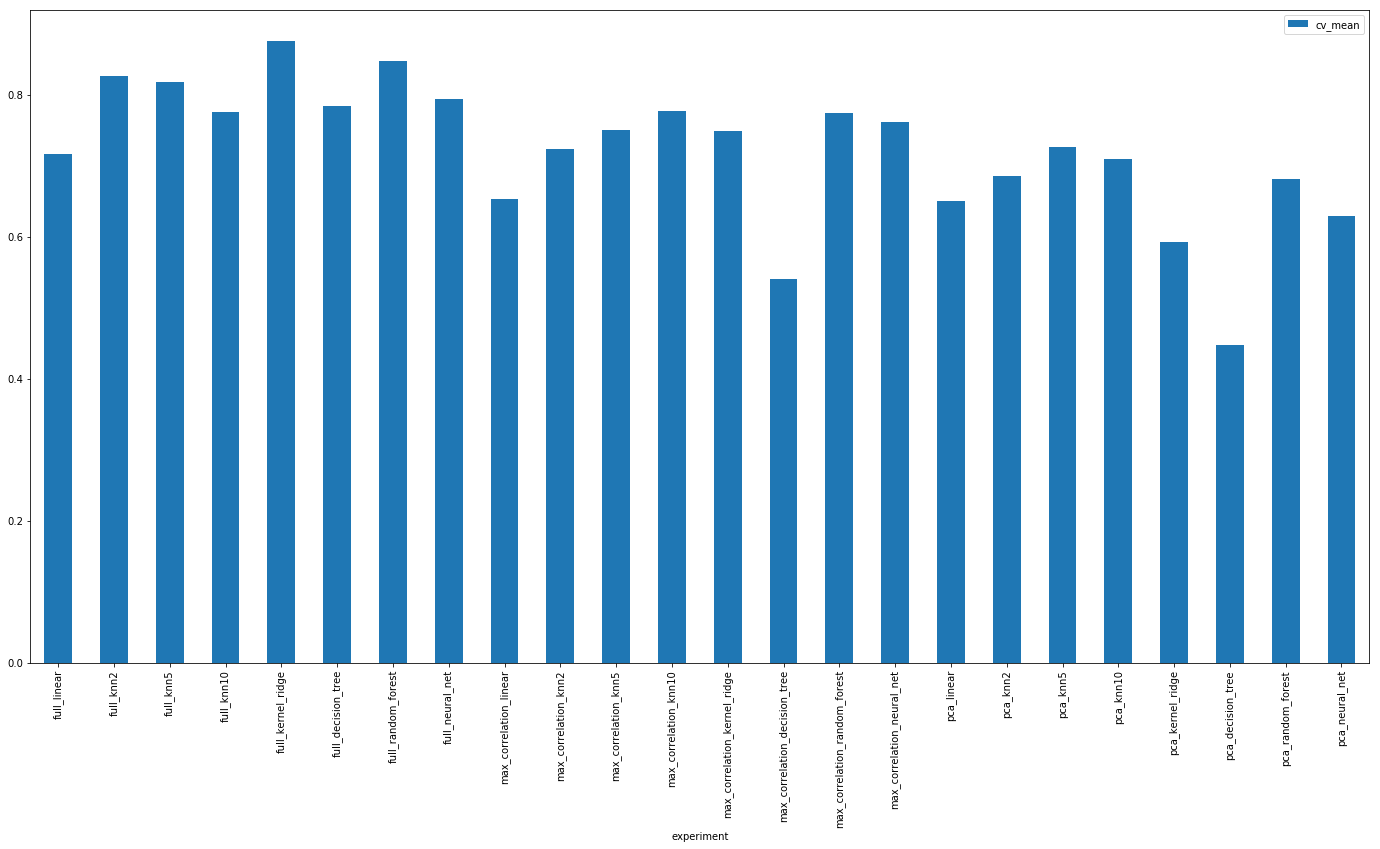

In [37]:
fig_metrics = matplotlib.pyplot.figure('regression_metrics', figsize=(24,12))
ax_metrics = fig_metrics.add_subplot(111)
cv_metrics.plot.bar(ax=ax_metrics, x='experiment',y='cv_mean')

## Further reading
This notebook is focused on how to use the scikit-learn library to process this example dataset. The choices here are fairly naive. For more in depth of analysis of how to find the best model for this dataset, the following blog post looks at important questions for any machine learning project in the context of this standard dataset:
* https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d